In [39]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv(r"C:\Credit card Prediction By Debu\notebook\data\credit_card_defaulter.csv")

In [41]:
df.head()

,Id,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [42]:
df.shape

(10000, 5)

In [43]:
data=df.drop(columns="Id",axis=1)

In [44]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [45]:
data.duplicated().sum()

0

In [46]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [47]:
data.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [48]:
cat_columns=data.columns[data.dtypes=="O"]
cat_columns

Index(['default', 'student'], dtype='object')

In [49]:
num_columns=data.columns[data.dtypes!="O"]
num_columns

Index(['balance', 'income'], dtype='object')

In [50]:
data[num_columns]

,balance,income
0,729.526495,44361.62507
1,817.180407,12106.13470
2,1073.549164,31767.13895
3,529.250605,35704.49394
4,785.655883,38463.49588
...,...,...
9995,711.555020,52992.37891
9996,757.962918,19660.72177
9997,845.411989,58636.15698
9998,1569.009053,36669.11236


In [51]:
data[cat_columns]

,default,student
0,No,No
1,No,Yes
2,No,No
3,No,No
4,No,No
...,...,...
9995,No,No
9996,No,No
9997,No,No
9998,No,No


In [52]:
data[num_columns].describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [53]:
data[cat_columns].describe()

,default,student
count,10000,10000
unique,2,2
top,No,No
freq,9667,7056


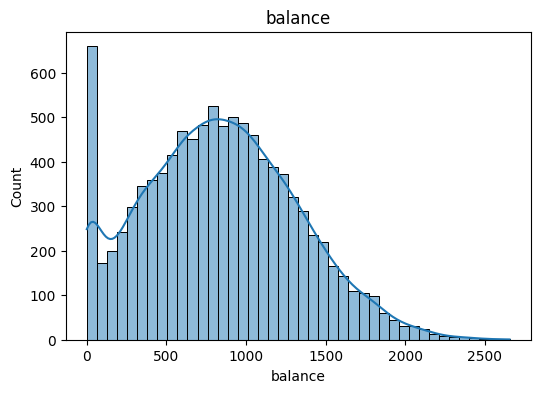

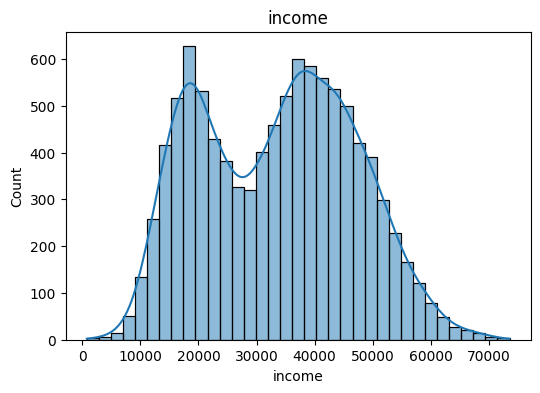

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[num_columns]:
    plt.figure(figsize=[6,4])

    sns.histplot(data[i],kde=True)
    plt.title(i)

In [55]:
data["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [56]:
data["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
l=LabelEncoder()
c=data.columns
for i in c:
  if data[i].dtypes=="O":
    data[i]=l.fit_transform(data[i])
  elif data[i].dtypes!="O":
    data[i]=m.fit_transform(data[[i]])

In [58]:
data

,default,student,balance,income
0,0,0,0.274845,0.598905
1,0,1,0.307868,0.155727
2,0,0,0.404453,0.425862
3,0,0,0.199392,0.479959
4,0,0,0.295991,0.517867
...,...,...,...,...
9995,0,0,0.268074,0.717488
9996,0,0,0.285558,0.259524
9997,0,0,0.318504,0.795031
9998,0,0,0.591115,0.493213


In [59]:
x=data.drop(labels='income',axis=1)

In [60]:
x

,default,student,balance
0,0,0,0.274845
1,0,1,0.307868
2,0,0,0.404453
3,0,0,0.199392
4,0,0,0.295991
...,...,...,...
9995,0,0,0.268074
9996,0,0,0.285558
9997,0,0,0.318504
9998,0,0,0.591115


In [61]:
y=data[["income"]]

In [62]:
y

,income
0,0.598905
1,0.155727
2,0.425862
3,0.479959
4,0.517867
...,...
9995,0.717488
9996,0.259524
9997,0.795031
9998,0.493213


In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [64]:
x_train

,default,student,balance
4318,0,0,0.668432
471,0,0,0.427030
9656,0,0,0.001545
8243,1,0,0.679718
9984,0,0,0.329742
...,...,...,...
7839,0,0,0.233041
3603,0,0,0.580683
5959,0,0,0.592547
5426,0,1,0.241116


In [65]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [70]:
print("r2_score",r2_score)
print("mae",mae)
print("mse",mse)

r2_score 0.5552412636842492
mae 0.09424426691795926
mse 0.015216366251922605
